In [2]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser
from platipy.imaging.registration.linear import linear_registration
from platipy.imaging.registration.utils import apply_transform

In [3]:
img_ct_lung_5 = sitk.ReadImage("./data/nifti/lung/PRHGD5257/IMAGES/PRHGD5257.nii.gz")
img_ct_lung_10 = sitk.ReadImage("./data/nifti/lung/LCTSC-Test-S1-101/IMAGES/LCTSC_TEST_S1_101_0_CT_0.nii.gz")

In [4]:
ctr = sitk.ReadImage("./PRHGD5257_LUNG/STRUCTURES/PRHGD5257_LUNG_2_RTSTRUCT_LUNG_L.nii.gz")

In [39]:
ctr2 = sitk.ReadImage("./data/nifti/lung/LCTSC-Test-S1-101/STRUCTURES/LCTSC_TEST_S1_101_0_RTSTRUCT_LUNG_L.nii.gz")

In [40]:
img_ct, tfm = linear_registration(
    img_ct_lung_5,
    img_ct_lung_10,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)


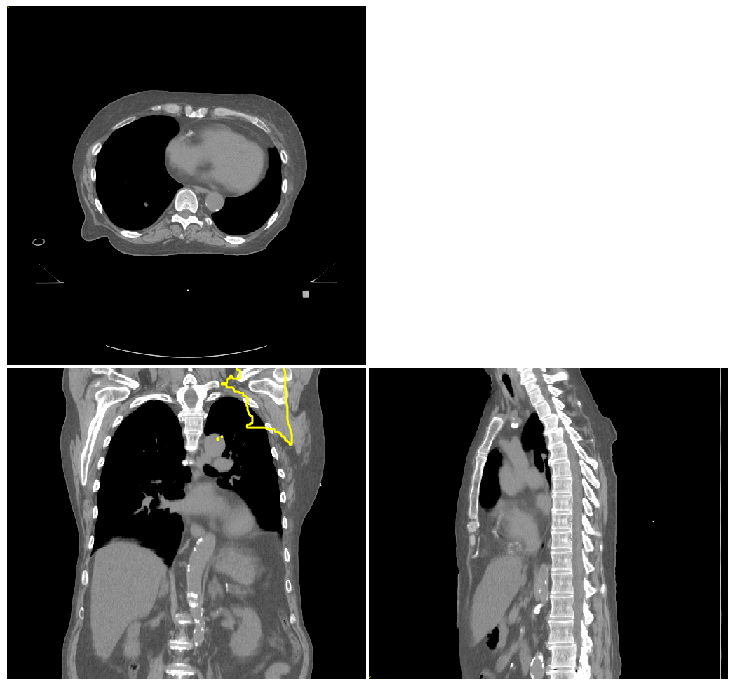

In [42]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_contour(ctr2, color="yellow", linewidth=2)

fig = vis.show()

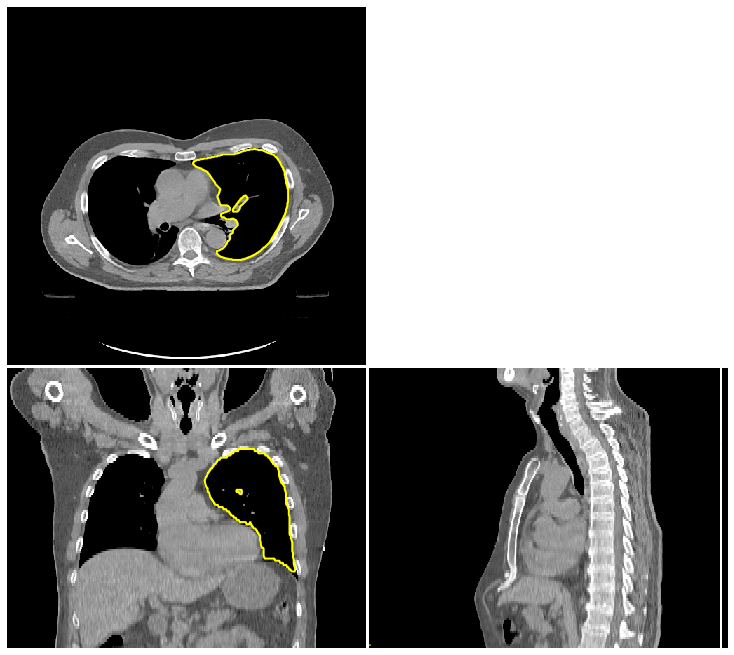

In [43]:
vis = ImageVisualiser(img_ct_lung_10)
vis.add_contour(ctr2, color="yellow", linewidth=2)
fig = vis.show()

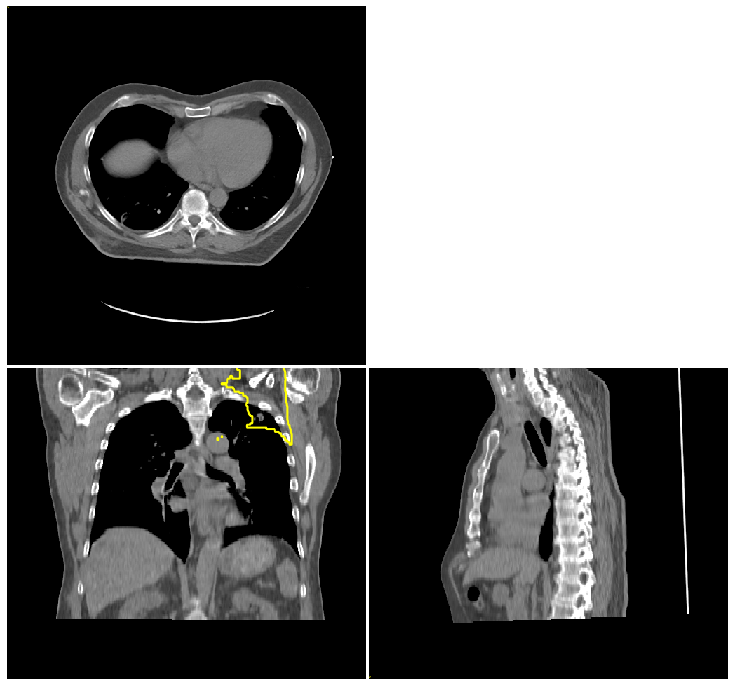

In [44]:
vis = ImageVisualiser(img_ct)
vis.add_contour(ctr2, color="yellow", linewidth=2)
vis.add_comparison_overlay(img_ct)
fig = vis.show()

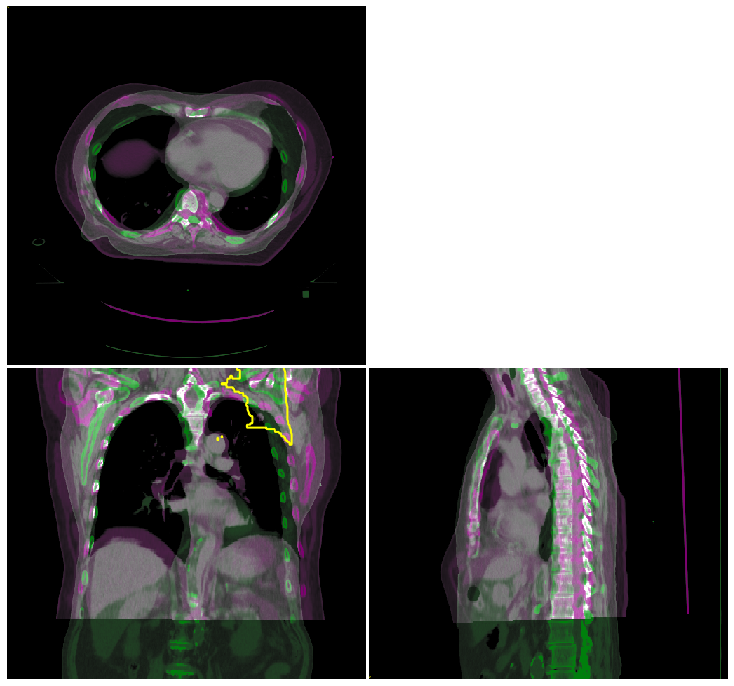

In [46]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_contour(ctr2, color="yellow", linewidth=2)
vis.add_comparison_overlay(img_ct)
fig = vis.show()

In [47]:
from platipy.imaging.registration.utils import apply_linear_transform


In [48]:
new_ct = apply_linear_transform(input_image=ctr2, transform=tfm, reference_image=img_ct, is_structure=True)

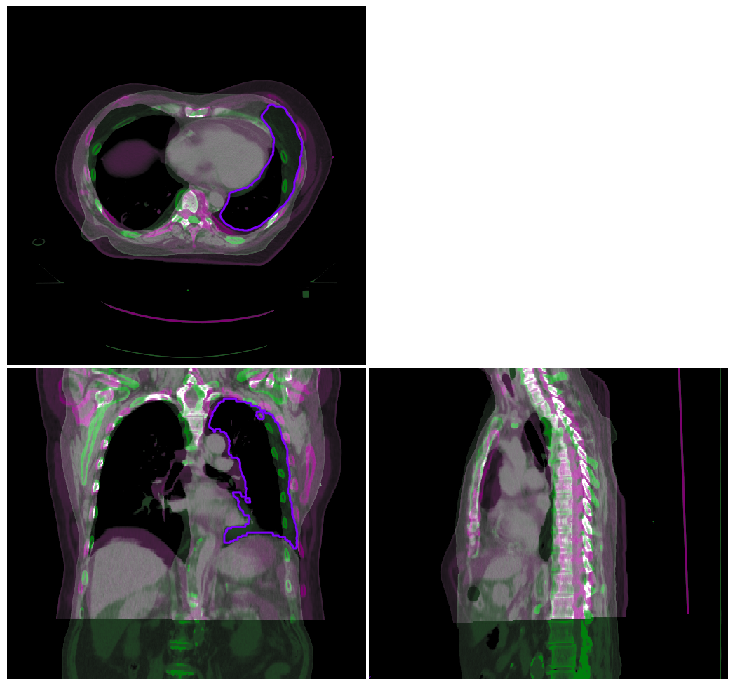

In [52]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_comparison_overlay(img_ct)
vis.add_contour(new_ct)
fig = vis.show()

In [13]:
from platipy.imaging.registration.deformable import fast_symmetric_forces_demons_registration
import matplotlib.pyplot as plt

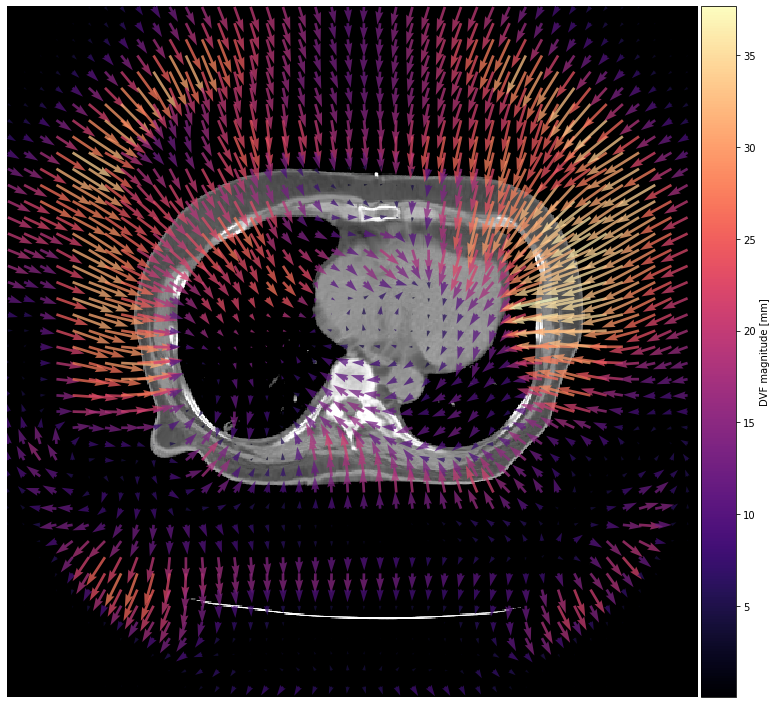

In [14]:
image_2_deformed, tfm_dir, dvf = fast_symmetric_forces_demons_registration(
img_ct_lung_5,
img_ct
)

vis = ImageVisualiser(image_2_deformed, axis="z")
vis.add_vector_overlay(
    dvf,
    subsample=12,
    arrow_scale=1,
    arrow_width=2,
    colormap=plt.cm.magma,
    name="DVF magnitude [mm]",
    color_function="magnitude"
)
fig = vis.show()

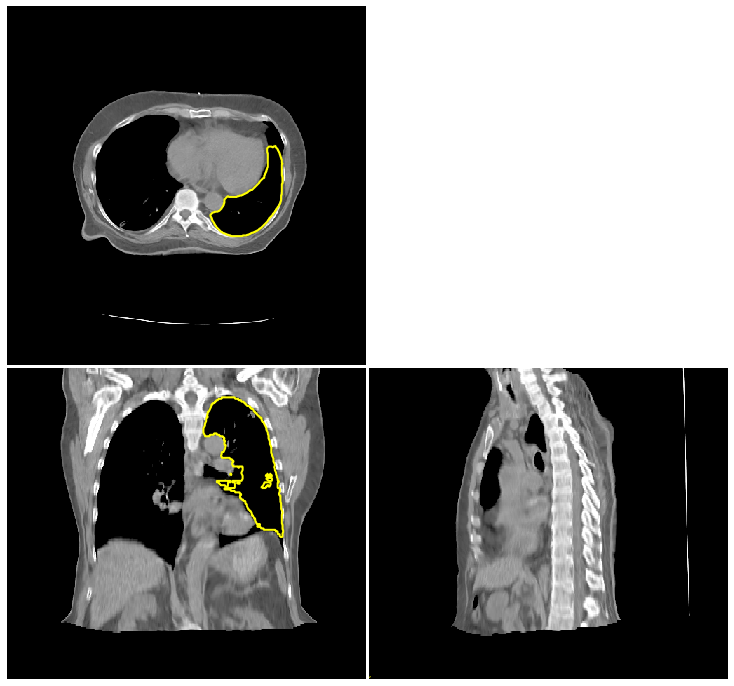

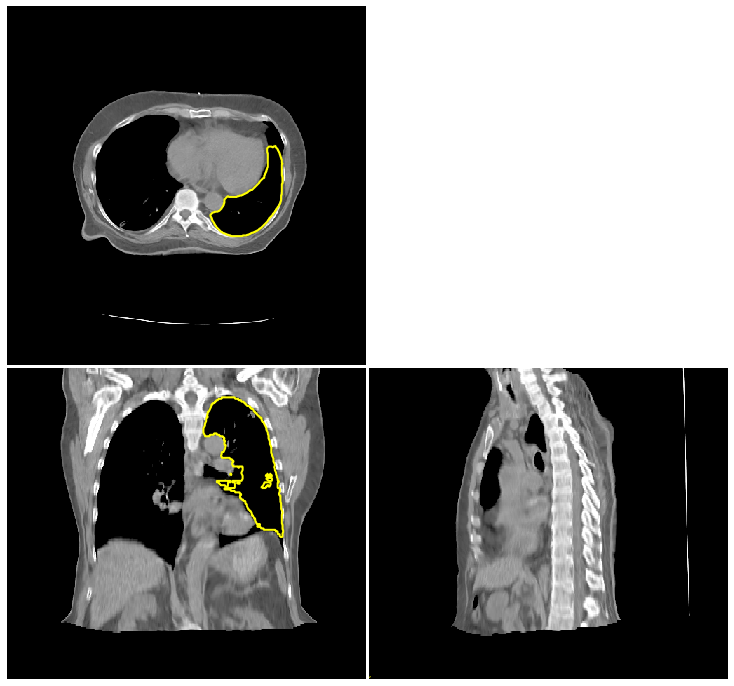

In [15]:
vis2 = ImageVisualiser(image_2_deformed)
vis2.add_contour(ctr, color="yellow", linewidth=2)

vis2.show()

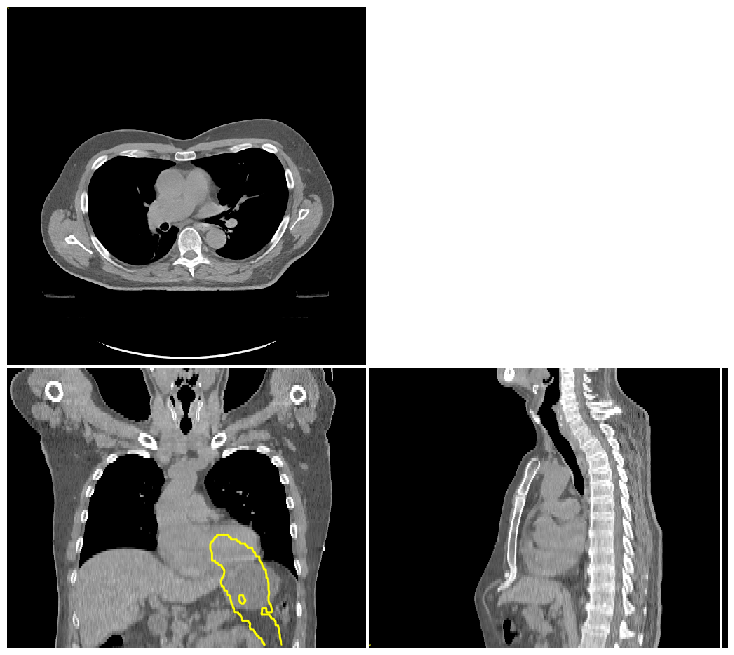

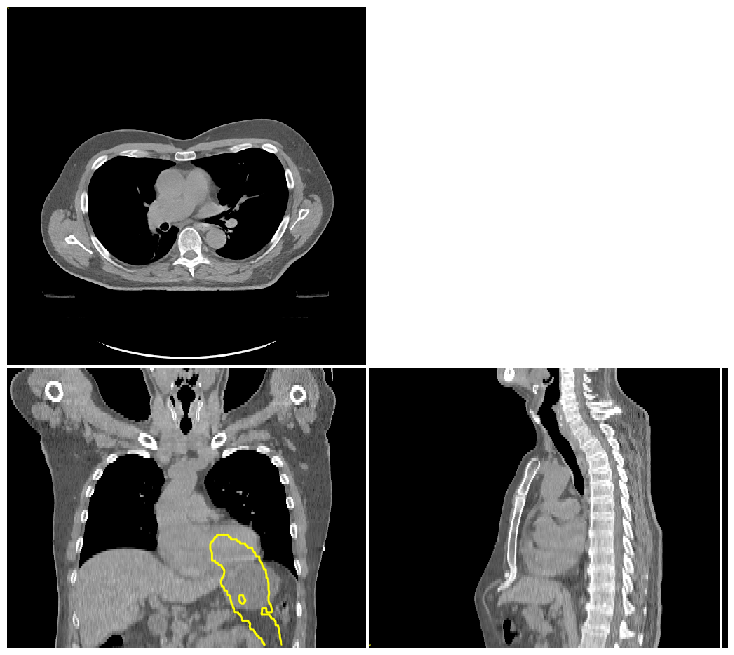

In [16]:
vis2 = ImageVisualiser(img_ct_lung_10)
vis2.add_contour(ctr, color="yellow", linewidth=2)

vis2.show()

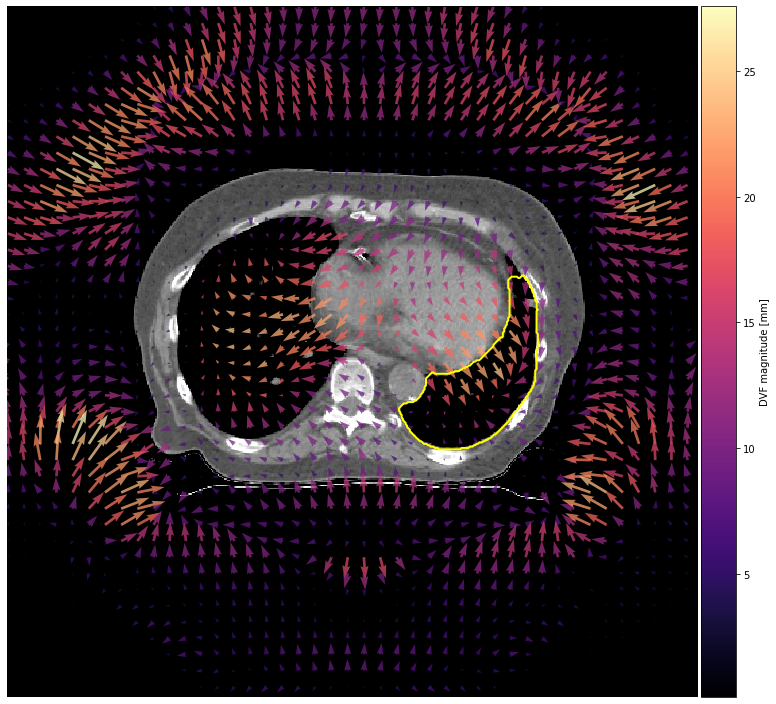

In [157]:
vis.add_contour(ctr, color="yellow", linewidth=2)
fig = vis.show()

In [17]:
ct_image_deformed = apply_transform(
    input_image=ctr,
    transform=tfm_dir,
    interpolator=sitk.sitkLinear,
)

In [18]:
from platipy.imaging.registration.utils import apply_deformable_transform

In [19]:
new_ct = apply_deformable_transform(input_image=ctr, transform=tfm_dir, is_structure=True, default_value=0, interpolator=sitk.sitkLinear)

2021-08-30 11:11:20.229 | WARNING  | platipy.imaging.registration.utils:apply_deformable_transform:130 - is_structure is set to True, but you have set default_value and/or interpolator. default_value and/or interpolator will be overwritten.


In [20]:
from platipy.imaging.label.utils import get_com

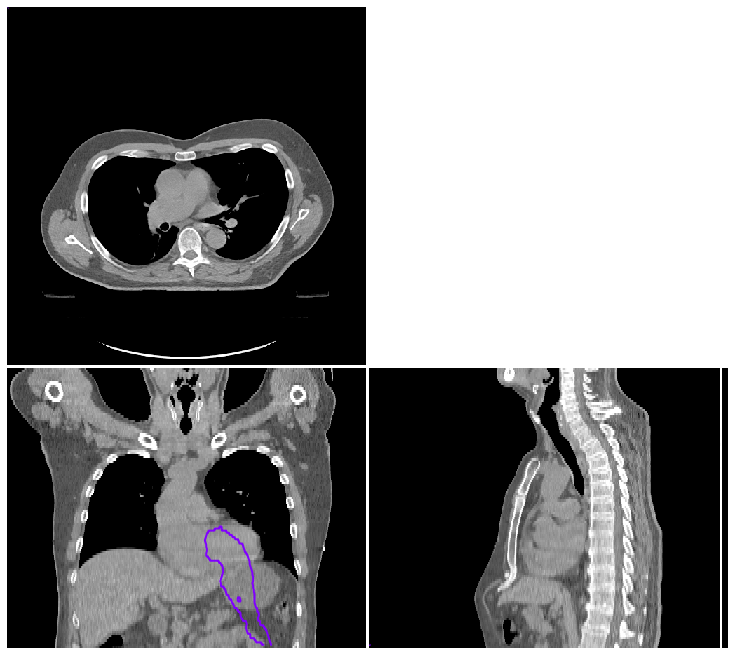

In [23]:
image_visualiser = ImageVisualiser(img_ct_lung_10)

image_visualiser.add_contour(new_ct)

fig = image_visualiser.show()


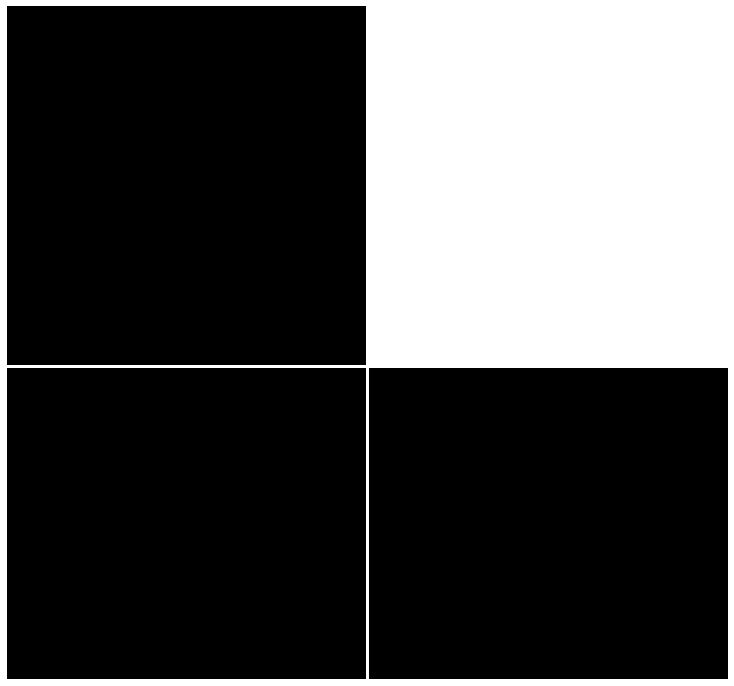

In [166]:
image_visualiser = ImageVisualiser(ct_image_deformed)
fig = image_visualiser.show()